# Excercise with Haberman dataset

1. Download Haberman Cancer Survival dataset from Kaggle. You may have to create a Kaggle account to donwload data. (https://www.kaggle.com/gilsousa/habermans-survival-data-set)
2. Perform a similar alanlaysis as above on this dataset with the following sections:
3. High level statistics of the dataset: number of points, numer of features, number of classes, data-points per class.
4. Explain our objective.
5. Perform Univaraite analysis(PDF, CDF, Boxplot, Voilin plots) to understand which features are useful towards classification.
6. Perform Bi-variate analysis (scatter plots, pair-plots) to see if combinations of features are useful in classfication.
7. Write your observations in english as crisply and unambigously as possible. Always quantify your results

## OBJECTIVE 

In [11]:
import seaborn as sns
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
data = pd.read_csv("E:/applied AI/File/haberman.csv")
data.head()

,AGE,Year,axil_nodes,Surv_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [13]:
data['Surv_status']=data['Surv_status'].map({1:"yes", 2:"no"})
data.head()

,AGE,Year,axil_nodes,Surv_status
0,30,64,1,yes
1,30,62,3,yes
2,30,65,0,yes
3,31,59,2,yes
4,31,65,4,yes


In [14]:
#Dimensions of the DataSet 
data.shape

(306, 4)

In [15]:
#What are the variables in  our dataset 
data.columns

Index(['AGE', 'Year', 'axil_nodes', 'Surv_status'], dtype='object')

In [16]:
#Ananlysis of Data 
data.describe()

,AGE,Year,axil_nodes
count,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144
std,10.803452,3.249405,7.189654
min,30.000000,58.000000,0.000000
25%,44.000000,60.000000,0.000000
50%,52.000000,63.000000,1.000000
75%,60.750000,65.750000,4.000000
max,83.000000,69.000000,52.000000


##### Observation 
    1. The mean age of paatient is 52 years 
    2. 25% of patient are less than age 44.
    3. 50% of patient are leas than age 52.
    4. 75% of patient are less than age 60.
    5. Standard Deviation for Age and axil_node is high so we can  say the spread is lare for Age and axil_nodes .

In [17]:
#Comparing if we have a balanced dataset or imbalanced dataset
data['Surv_status'].value_counts()

yes    225
no      81
Name: Surv_status, dtype: int64

#### Observation
Since the no of people did not  survived is 1/3 people who survived hence we can this is an unbalanced dataset .

# 2-D Scatter PLot of the Data set 

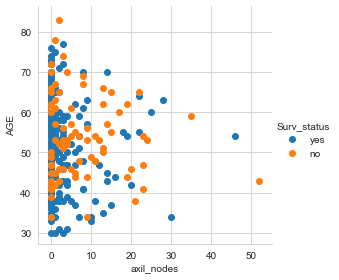

In [18]:
#data.plot(kind='scatter' , x='AGE', y='Surv_status')
#plt.show()

sns.set_style("whitegrid")
sns.FacetGrid(data, hue="Surv_status", height=4)\
    .map(plt.scatter, "axil_nodes" ,"AGE")\
    .add_legend()
plt.show()

#### Observation
1. People with age more than 50 are more likely to die .
2. No of axial node is very rarely more than 30 .
3. Patients who are older than 50 and have axil nodes greater than 10 are more likely to die

# Pair  Plot

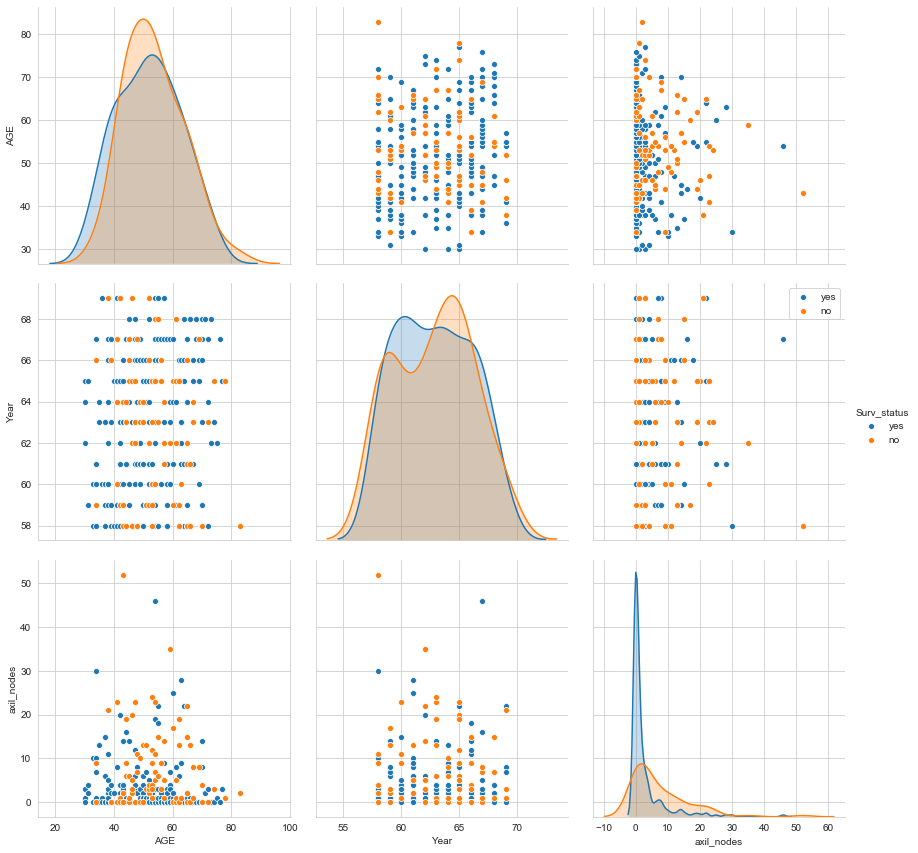

In [58]:
plt.close()
sns.set_style("whitegrid")
sns.pairplot(data,hue="Surv_status", height=4)
plt.legend()
plt.show()

#### Observation
1. From the last plot we can conclude that if the no of axil_node is equal to 0 then patient is likely to survive  

# 1-D Scatter Plot 

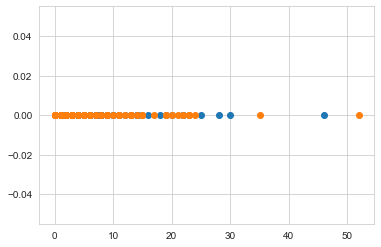

In [57]:
data_1 = data.loc[data["Surv_status"]=='yes']
data_2 = data.loc[data["Surv_status"]=='no']

plt.plot(data_1["axil_nodes"],np.zeros_like(data_1['AGE']),'o')
plt.plot(data_2["axil_nodes"],np.zeros_like(data_2['AGE']),'o')
plt.show()



#### Observation
1. We can conclude from this plot is that the if the no of axil_node is less than the chances of survival is more 

## Histogram 


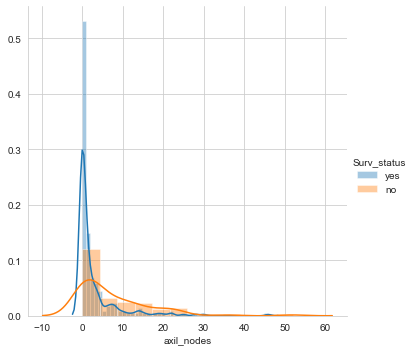

In [21]:
sns.FacetGrid(data, hue="Surv_status", height=5)\
    .map(sns.distplot,"axil_nodes")\
    .add_legend()

plt.show()

#### Observation
1. If the axial_node is less than there is more chances of survival .

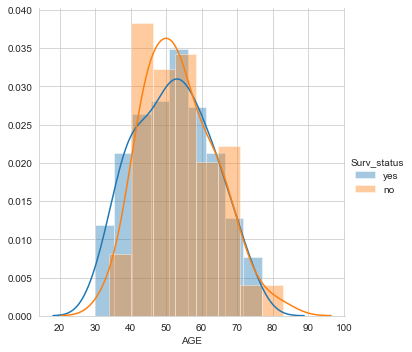

In [22]:
sns.FacetGrid(data, hue="Surv_status", height=5)\
    .map(sns.distplot,"AGE")\
    .add_legend()

plt.show()

#### Observation 
1. Patient with age less than 40 are more likely to survive .
2. Patient with age more than 60 are more likely to die .

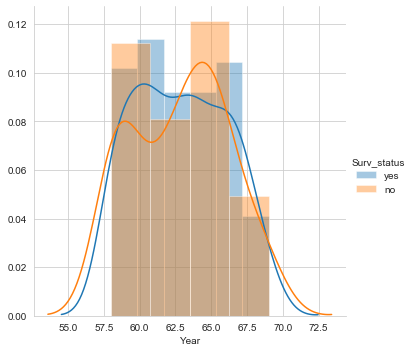

In [23]:
sns.FacetGrid(data, hue="Surv_status", height=5)\
    .map(sns.distplot,"Year")\
    .add_legend()

plt.show()

#### Observation 
1. If the operation year is in between 60 to 66 then chances of patient dying is also more .

# CDF

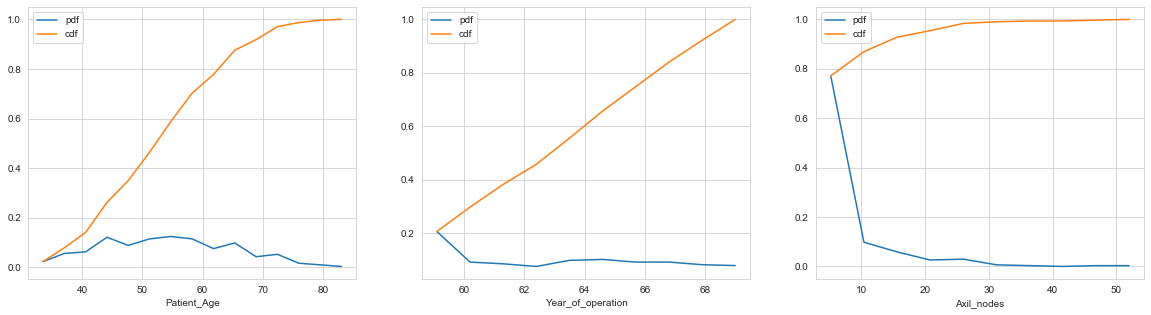

In [65]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
counts ,bin_edges = np.histogram(data['AGE'],bins=15 ,density=True)
plt.xlabel('Patient_Age')
pdf=counts/sum(counts)
#print(pdf)
#print(bin_edges)
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label='pdf')
plt.plot(bin_edges[1:],cdf,label='cdf')
plt.legend()


plt.subplot(1,3,2)
counts ,bin_edges = np.histogram(data['Year'],bins=10,density=True)
pdf=counts/sum(counts)
#print(pdf)
#print(bin_edges)

cdf=np.cumsum(pdf)
plt.xlabel('Year_of_operation')
plt.plot(bin_edges[1:],pdf,label='pdf')
plt.plot(bin_edges[1:],cdf,label='cdf')
plt.legend()

plt.subplot(1,3,3)
counts ,bin_edges = np.histogram(data['axil_nodes'],bins=10,density=True)
pdf=counts/sum(counts)
#print(pdf)
#print(bin_edges)
cdf=np.cumsum(pdf)
plt.xlabel('Axil_nodes')
plt.plot(bin_edges[1:],pdf,label='pdf')
plt.plot(bin_edges[1:],cdf,label='cdf')
plt.legend()

#### Observation
1. From the third plot('Axil_Node ) we can observe tahat their is  75% of chances of survival if the axil_nodes are less than 10
2. As the no of Axil_Node goes on increasing then the chances of survivng also goes on .
3. There is 40% percent chance of survival if the no of axil_node is less than 6 or 7. 
4. There is 70 percentage chance of dying if the patient age is more than 60 .
5. there is 60 percentage chance of dying if the year of operation is more than 64.

## Mean , Variance and Standard Deviation

In [27]:
print("means")
print("mean year" , np.mean(data['Year']))
print("mean age" , np.mean(data['AGE']))
print("mean axil_node" , np.mean(data['axil_nodes']))

print("median")
print("meadian Year ", np.median(data['Year']))
print("median Age ",np.median(data['AGE']))
print("median Axil_Node" , np.median(data['axil_nodes']))

means
mean year 62.85294117647059
mean age 52.45751633986928
mean axil_node 4.026143790849673
median
meadian Year  63.0
median Age  52.0
median Axil_Node 1.0


In [28]:
print("Variance")
print("Variance in year ",np.var(data['Year']))
print("Variance in Age ",np.var(data['AGE']))
print("Variance in Axil_node", np.var(data['axil_nodes']))

print("*************************")

print("Percentile")
print("percentile of Year" ,np.percentile(data['Year'],np.arange(0,100,25)))
print("percentile of Age", np.percentile(data['AGE'],np.arange(0,100,25)))
print("percentile of Axil_Node" , np.percentile(data['axil_nodes'],np.arange(0,100,25)))

Variance
Variance in year  10.524125336409075
Variance in Age  116.33316245888335
Variance in Axil_node 51.52219231919347
*************************
Percentile
percentile of Year [58.   60.   63.   65.75]
percentile of Age [30.   44.   52.   60.75]
percentile of Axil_Node [0. 0. 1. 4.]


## Standard Deviation

In [87]:
print("standar diviation")
print("Standard Deviation in Year  :", np.std(data['Year']))
print("Standard deviation in Age :", np.std(data['AGE']))
print("standard Deviation in Axil_node: ",np.std(data['axil_nodes']))



standar diviation
Standard Deviation in Year  : 3.244090833563246
Standard deviation in Age : 10.785785203631832
standard Deviation in Age:  7.177896092811143


## Median Absolute Deviation

In [90]:
from statsmodels import robust
print("Medain Absolutr Deviation")
print(robust.mad(data['Year']))
print(robust.mad(data['AGE']))
print(robust.mad(data['axil_nodes']))

Medain Absolutr Deviation
4.447806655516806
11.860817748044816
1.482602218505602


## BOX PLOT

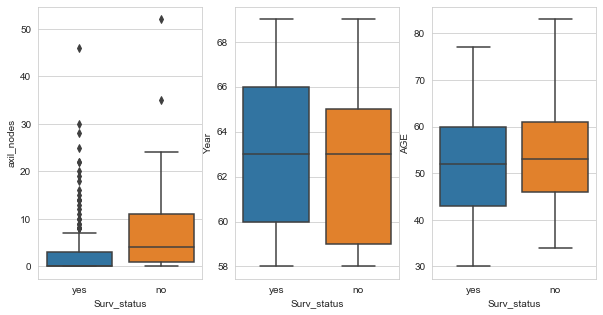

In [46]:
plt.figure(figsize=(10,5))

plt.subplot(131)
plt.grid
sns.boxplot(x='Surv_status' , y='axil_nodes',data=data)
#plt.show()

plt.subplot(132)
plt.grid
sns.boxplot(x='Surv_status' , y='Year',data=data)
#plt.show()

plt.subplot(133)
plt.grid
sns.boxplot(x='Surv_status' , y='AGE',data=data)
#plt.show()


###### Observation:
    1:The survival box has 25th percentile of data(axil_nodes) at 0 and 75th percentile of data(axil_node) at 4 .
    2.Similarly for non survival the box plot has 25th percentile of data(axil_nodes) at 1 or 2 and 75th percentile of data(axil_node) at 11 or 12 .
    3.Box plot has outliers which an be clearly observed as the threshold for survival is at 7.
    4 Rest two plots are almost same and no conclusion can be infered from them .
    

## Voilin Plot

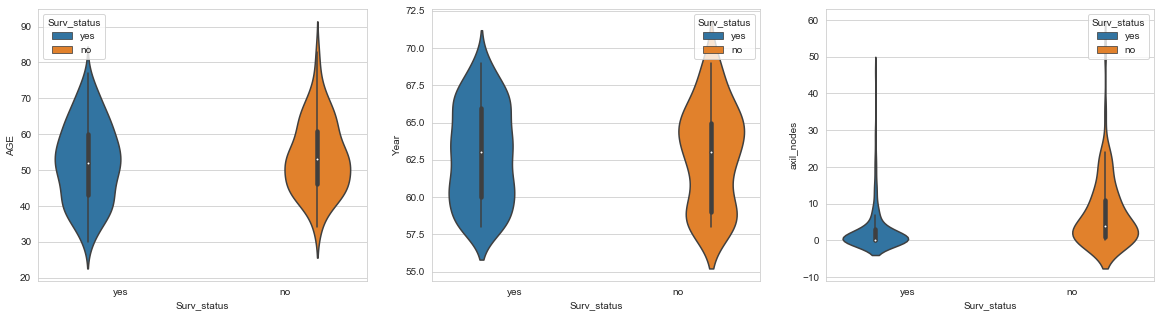

In [70]:
plt.figure(figsize=(20,5))
plt.subplot(131)
sns.violinplot(x="Surv_status", y="AGE" ,hue="Surv_status", data=data ,height=5)

plt.subplot(132)
sns.violinplot(x="Surv_status", y="Year",hue="Surv_status",data=data,height=5)

plt.subplot(133)
sns.violinplot(x="Surv_status", y="axil_nodes",hue="Surv_status",data=data,height=5)
    



Voilin PLot Infer the same conclusion we did with the help of Box Plot.

#### Overall Observation
1. If the No of axil_node is less than 4 than the chances of survival is more 
2. No proper conclusion can be withdrawn from the Age and Operation age Variable .
3. Box Plot and CDF plot gave important obsrvation .
4. Axil_Node Has a outliers hence it we can say it was an imbalanced dataset
5. It is very much less likely to have patients with axil nodes more than 30.
6. Patients who are older than 50 and have axil nodes greater than 10 are more likely to dead.
7. Axil_nodes is most important feature in this dataset, as who had Axil node >= 1 those are more likely to die
8. Age is also somewhat important feature of this dataset, because we have seen that patients who aged less than 40 are likely to survive inspite of having axil node >= 1
